In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

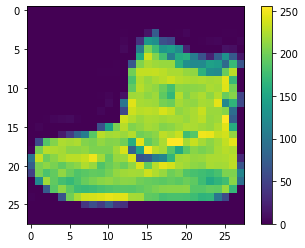

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
#Escalando as imagens no intervalo entre 0 e 1
train_images = train_images/255.0
test_images = test_images/255.0

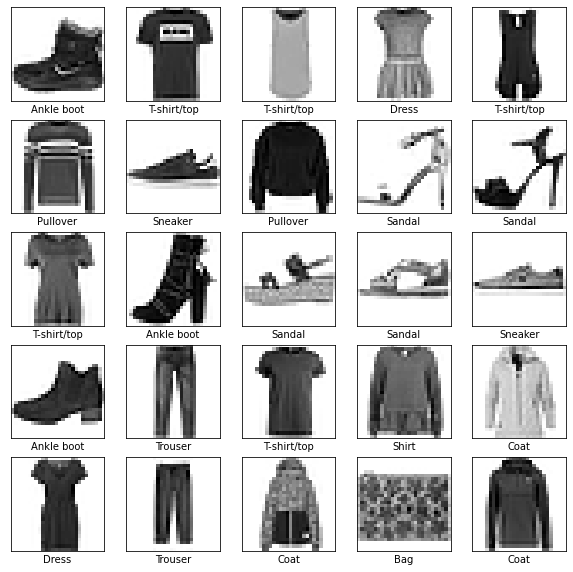

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
#Construindo o modelo
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4998 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2963 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3268 - accuracy: 0.8895


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([6.89528221e-08, 5.30859934e-09, 3.16064366e-08, 3.57146090e-10,
       1.45208565e-08, 2.36166036e-03, 1.27519854e-06, 1.32210515e-02,
       1.72261352e-07, 9.84415710e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
def plot_images(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

In [25]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color("blue")

<function matplotlib.pyplot.show>

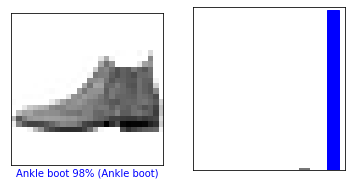

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show

<function matplotlib.pyplot.show>

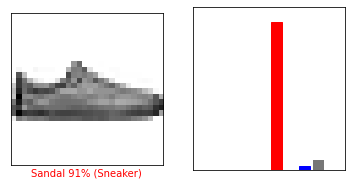

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show

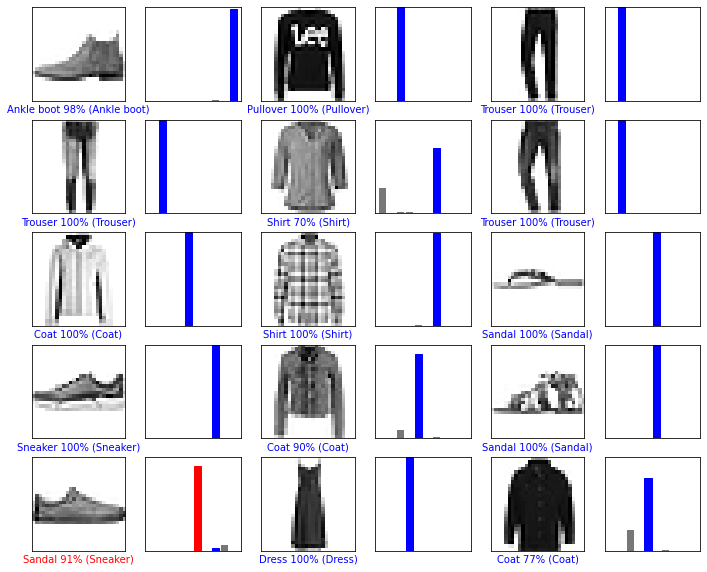

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
img = test_images[0]
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [31]:
predictions_single = model.predict(img)

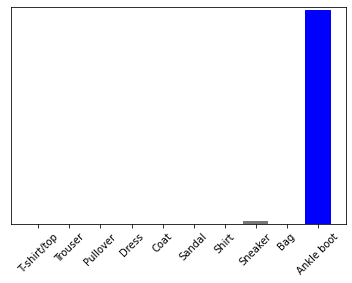

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
predictions_single

array([[6.8952957e-08, 5.3086193e-09, 3.1606497e-08, 3.5714609e-10,
        1.4520884e-08, 2.3616639e-03, 1.2751998e-06, 1.3221058e-02,
        1.7226134e-07, 9.8441571e-01]], dtype=float32)

In [34]:
np.argmax(predictions_single[0])

9